# Data Visualization



https://campus.datacamp.com/courses/introduction-to-data-visualization-with-matplotlib/introduction-to-matplotlib?ex=1



In [1]:
# Preparação
import matplotlib.pyplot as plt
import pandas as pd

dict = { 0: { 'x':20, 'y':46.77 , 'a': 15, 'b':100},
           1: { 'x':35, 'y':66.03, 'a': 45, 'b':100},
           2: { 'x':62, 'y':80.62, 'a': 22, 'b':100},
           3: { 'x':101, 'y':5.084, 'a': 87, 'b':100} }

df = pd.DataFrame(dict).T
df

,x,y,a,b
0,20.0,46.770,15.0,100.0
1,35.0,66.030,45.0,100.0
2,62.0,80.620,22.0,100.0
3,101.0,5.084,87.0,100.0


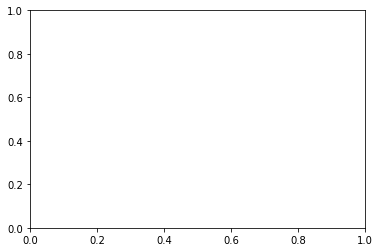

In [2]:
# subplots:
fig, ax = plt.subplots()
    # cria dois objetos (figura e axis)
    # figura: container -> segurao que tem na página (page)
    # axis: eixos, são parte da página
plt.show() # printa o que está armazenado na página

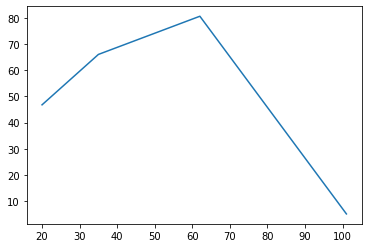

In [3]:
# plot: método do objeto axis 
fig, ax = plt.subplots() # necessário chamar nessa célula
ax.plot(df['x'],df['y']) # modifica os eixos; (deafult é uma linha)
plt.show() #desenha a linha

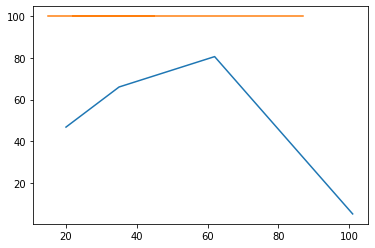

In [4]:
# mostrando mais de uma linha:
fig, ax = plt.subplots()
ax.plot(df['x'],df['y'])
ax.plot(df['a'],df['b'])
plt.show()

### Customização do plot

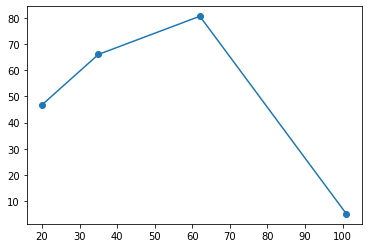

In [5]:
# Atributo marker: marca os pontos na linha
fig, ax = plt.subplots() # necessário chamar nessa célula
ax.plot(df['x'],df['y'], marker='o') # marca os pontos na linha 
# possíveis valores de marker: https://matplotlib.org/api/markers_api.html
plt.show() #desenha a linha

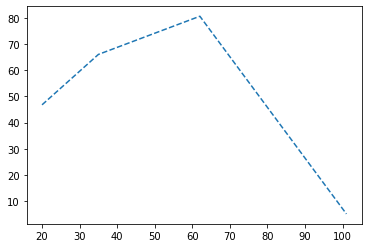

In [6]:
# Atributo linestyle: 
fig, ax = plt.subplots()
ax.plot(df['x'],df['y'], linestyle='--') 
plt.show()

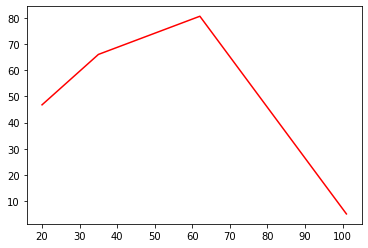

In [7]:
# Atributo color: 
fig, ax = plt.subplots()
ax.plot(df['x'],df['y'], color='r') 
plt.show()

Métodos de axis que começam com set alteram propriedades do objeto.


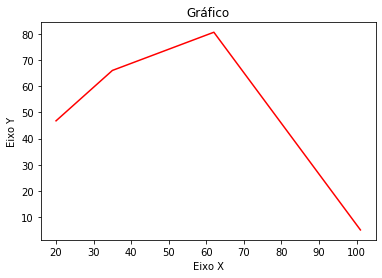

In [8]:
# método set_xlabel e set_ylabel:
fig, ax = plt.subplots()
ax.plot(df['x'],df['y'], color='r') 
ax.set_xlabel("Eixo X")
ax.set_ylabel("Eixo Y")
# método set_title:
ax.set_title("Gráfico")
plt.show()

### Small multiples (subplots)

Divide a tela em quadros para mostrar gráficos diferentes (pra não ficar bagunçado)

ax: deixa de ser objeto axis e passa a ser matriz de axes.

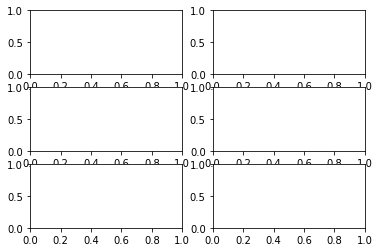

In [9]:
# fig, ax = plt.subplots() # chamado sem argumentos cria um subplot por default
fig, ax = plt.subplots(3,2) # divide a tela em uma matriz 3x2 de subplots
plt.show()

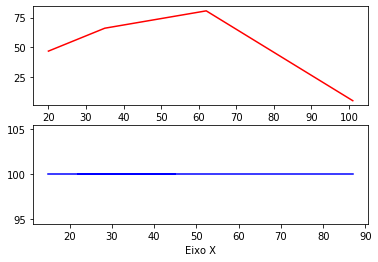

In [10]:
# adicionando dados: ax[índice numérico matricial]
fig, ax = plt.subplots(2,1) 
ax[0].plot(df['x'],df['y'], color='r') # index = 0
ax[0].set_xlabel("Eixo X") # label do eixo só aparece se for abaixo do último
ax[1].plot(df['a'],df['b'], color='b') # index = 1
ax[1].set_xlabel("Eixo X") # tipo aqui
plt.show()

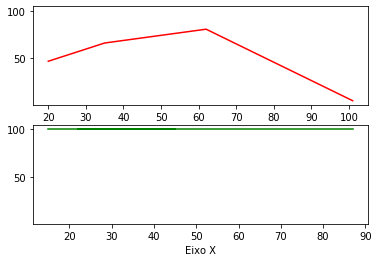

In [11]:
fig, ax = plt.subplots(2,1, sharey=True) # garante que os eixos y tenham o mesmo range
ax[0].plot(df['x'],df['y'], color='r') # index = 0
ax[0].set_xlabel("Eixo X") # label do eixo só aparece se for abaixo do último
ax[1].plot(df['a'],df['b'], color='g') # index = 1
ax[1].set_xlabel("Eixo X") # tipo aqui
plt.show()

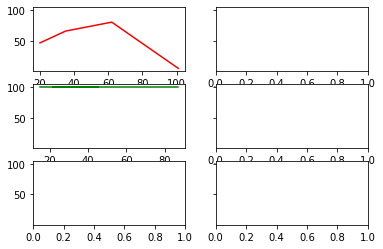

In [13]:
fig, ax = plt.subplots(3,2, sharey=True) # garante que os eixos y tenham o mesmo range
ax[0,0].plot(df['x'],df['y'], color='r') # index = 0
ax[0,0].set_xlabel("Eixo X") # label do eixo só aparece se for abaixo do último
ax[1,0].plot(df['a'],df['b'], color='g') # index = 1
ax[1,0].set_xlabel("Eixo X") # tipo aqui
plt.show()

In [ ]:
# Create a Figure and an array of subplots with 2 rows and 2 columns
fig, ax = plt.subplots(2, 2)

# Addressing the top left Axes as index 0, 0, plot month and Seattle precipitation
ax[0, 0].plot(seattle_weather['MONTH'], seattle_weather['MLY-PRCP-NORMAL'])

# In the top right (index 0,1), plot month and Seattle temperatures
ax[0, 1].plot(seattle_weather['MONTH'], seattle_weather['MLY-TAVG-NORMAL'])

# In the bottom left (1, 0) plot month and Austin precipitations
ax[1,0].plot(austin_weather['MONTH'], austin_weather['MLY-PRCP-NORMAL'])

# In the bottom right (1, 1) plot month and Austin temperatures
ax[1,1].plot(austin_weather['MONTH'], austin_weather['MLY-TAVG-NORMAL'])
plt.show()

## Séries temporais

- Designamos a coluna data como índice; Ne está no formato numérico ou string, convertemos para formato date (tipo de variável dtype = datetime).
- É recomendado que se disponha as datas e horários do maior para o menor -> Exemplo: AAAA-MM-DD-HH-MM-SS (ano mês dia hora minuto segundo). Isso facilita a pesquisa dos valores.


In [ ]:
# Carrega dataset com data como dtype date e como índice:
df = pd.read_csv('database.csv', parse_dates=["date"], index_col="date") #parse tem que ser lista

In [ ]:
fig, ax = plt.subplots()
ax.plot(df.index, climate_change['variavel'])
plt.show()

In [ ]:
# subset:
subset = df["1970-01-01" : "1979-12-31"] # limite externo incluso?

### Duas escalas no eixo y

Quando queremos plotar dois gráficos em um, só que a variável y de cada um é diferente (até em escala.

In [ ]:
# primeiro eixo y
fig, ax = plt.subplots()
ax.plot(df.index, df['variavel'], color='r')
ax.set_ylabel('Tal', color='r')

#segundo eixo y
ax2 = ax.twinx() # divide o x
ax2.plot(df.index, climate_change['outra'], color='g')
ax2.set_ylabel('Outro tal', color='g')
plt.show()

In [ ]:
# customizando mais ainda: colorindo os ticks (marcações do eixo)
ax.tick_params('y', colors='red') # atenção: argumento colors no plural
ax2.tick_params('y', colors='green') 

In [ ]:
# tudo (de um eixo y) reunido numa função:
def plot_timeseries(axes, x, y, color, xlabel, ylabel):
    axes.plot(x, y, color=color)
    axes.set_xlabel(xlabel)
    axes.set_ylabel(ylabel, color=color)
    axes.tick_params('y', colors=color)

In [ ]:
# chamando a função:
fig, ax = plt.subplots()
plot_timeseries(ax, df.index, df['variavel'], 'blue', 'Time', 'Variável tal')

ax2 = ax.twinx()
plot_timeseries(ax2, df.index, df['variavel'], 'red', 'Time', 'Variável tal')

plt.show()

### Anotações

Pequenos comentários nos gráficos

Documentação: https://matplotlib.org/users/annotations.html

In [ ]:
ax.annotate("Texto de anotação", xy=[pd.TimeStamp("2015-10-06"),1]) # admite [] ou ()
# adiciona o texto apontando para o ponto de coordenada especificada.

# Mexendo na posição da anotação:
ax.annotate("Texto de anotação",
            xy=(pd.TimeStamp("2015-10-06"),1), 
           xytext=(pd.TimeStamp("2008-01-01"),2)) # coordenadas do texto

# adicionando seta apontando da anotação para o ponto em questão
ax.annotate("Texto de anotação",
            xy=(pd.TimeStamp("2015-10-06"),1), 
           xytext=(pd.TimeStamp("2008-01-01"),2),
           arrowprops={}) # cria seta default (passamos dicionário vazio)
           # arrowprops={"arrowstyle":"->", "color":"gray"}) # cria seta customizada

## Comparações quantitativas

### Gráfico de barras (bar-charts)
- Usando para comparações quantitativas de variáveis categóricas em diferentes condições
- Método de axis: bar

In [ ]:
fig, ax = plt.subplots
ax.bar(df.index,df['variavel'])
plt.show()

In [ ]:
# rotacionando os labels do eixo do gráfico (bom pra quando há sobreposição); adicione ao código:
ax.set_xticklabels(df.index, rotation=90) # recebe os labels e os graus de rotação (anti-horário)

In [ ]:
# uma barra em cima da outra:
fig, ax = plt.subplots
ax.bar(df.index,df['variavel'], label='Variavel 1')
ax.bar(df.index,df['variavel2'], bottom=df['variavel'], label='Variavel 2') # bottom fixa qual altura começa a barra
ax.bar(df.index,df['variavel3'], bottom=df['variavel'] + df['variavel2'], label='Variavel 3')

# é necessário distinguir cada barra com legenda:
ax.legend() # tem que colocar o argumento label='Nome' pra cada variável plotada
plt.show()

### Histogramas
- Usando para visualizar a distribuição de valores de uma variável
- Método de axis: hist


In [ ]:
fig, ax = plt.subplots
ax.hist(df['variavel'])
ax.set_xlabel("Valor da variável")
ax.set_ylabel("Ocorrências")
plt.show()

In [ ]:
# mais de um histograma
fig, ax = plt.subplots
ax.hist(df['variavel'], label="Primeira") # label é importante
ax.hist(df['variavel2'], label="Segunda") # label é importante
ax.set_xlabel("Valor da variável")
ax.set_ylabel("Ocorrências")
ax.legend()
plt.show()

In [ ]:
# ajustando a largura da barra: argumento bins
ax.hist(df['variavel'], bins=5) # divide o range em 5 unidades (classes)
ax.hist(df['variavel'], bins=[10,20,30,40,50]) # lista dos limites de classe

In [ ]:
# mudando o estilo da barra: argumento histtype
ax.hist(df['variavel'], histtype='step') # step é melhor pra ver se há sobreposição de histogramas

### Plotagem estatística
- Comparações através da visualização.

#### Barra de erro
- Muito confuso, não sei como aplicar.

In [ ]:
# adicionando barras de erros ao gráfico de barras: substitua a barra por isso
ax.bar("Nome da variável", # label da coluna?
      df['variavel'].mean(), # equivalente ao bottom (só que aqui posicionamos o meio da barra) na média da variável
      yerr=df['variavel'].std()) # tamanho da barra (um desvio pra cima e um pra baixo)

In [ ]:
# adicionando barras de erros ao gráfico de linha: substitua a linha por isso
ax.errorbar(df.index,
            df['variavel'], # equivalente ao bottom (só que aqui posicionamos o meio da barra) na média da variável
            yerr=df['desvio_da_variavel']) # tamanho da barra (um desvio pra cima e um pra baixo)

#### BOXPLOT
Limites:
- Linha do meio: mediana
- Extremidades da caixa: 25-percentil e 75-percentil (primeiro e quarto quartil)
- Tamanho da barra fina: uma vez e meia a extensão da caixa (faixa interquartil entre os percentis 75 e 25)
- Pontos externos: outliers, 1% de uma distribuição normal.

In [ ]:
# boxplot para duas sequencias da mesma variável (ou não) na mesma página
fig, ax = plt.subplot()
ax.boxplot([df1['variavel'],df2['variavel']]) # recebe lista de variáveis 
ax.set_xticklabels(["Dataframe 1", "Dataframe 2"]) # setando os labels de cada variável passada
ax.set_ylabel("Variável")

plt.show()

### Scatter plot

- Comparação entre duas variáveis (cada uma em um eixo) 
- Os valores de cada variável será uma coordenada do ponto que representa aquele registro/subject.
- Chamado também de gráfico de dispersão

In [ ]:
fig, ax = plt.subplots()
ax.scatter(df['v1'], df['v2'])
plt.show()

In [ ]:
# As cores são importantes para visualização quando há sobreposição de gráficos de dispersão. (argumento c)
ax.scatter(df['v1'], df['v2'], c=df.index) # efeito legal mas pouco útil

### Estilo do gráfico
Documentação: https://matplotlib.org/gallery/style_sheets/style_sheets_reference.html

In [ ]:
# antes de chamar fig, ax = plt.sublops():
plt.style.use("ggplot") # customiza vários elementos do gráfico (ggplot é um estilo da biblioteca R)
plt.style.use("default") # o de sempre
plt.style.use("bmh") # ou outro lá
plt.style.use("seaborn_colorblind") # para daltonicos; tem o 'tableau-colorblind10' também
plt.style.use("grayscale") # escala de cinza

Dicas:
- Evite fundos escuros
- Se cores forem importantes, considere os daltônicos
- Se for imprimir prefira modelos que usem menos tinta.
- Se for imprimir em preto e branco, use 'grayscale'


### Salvando o gráfico

In [ ]:
# substitua plt.show() por:
fig.savefig("nome_do_arquivo.png") # png é um formato grande
fig.savefig("nome_do_arquivo.png", dpi=300) # qualidade da imagem; pontos por polegada (300 é alto)
fig.savefig("nome_do_arquivo.jpg") # jpg é formato compactado, se quiser usar em um site
fig.savefig("nome_do_arquivo.jpg", quality=50) # qualidade da imagem (de 1 a 100) obs.: evite 95 pra cima, não compensa compactar com essa qualidade
fig.savefig("nome_do_arquivo.svg") # formato de gráfico vetorizado (editável no illustrator)

In [ ]:
# em shells de python podemos só chamar:
ls # fornece a lista dos arquivos do diretório de trabalho atual
# retornou uns negocios ininteligíveis

In [ ]:
# tamanho do gráfico:
fig.set_size_inches([5,3]) # largura e altura

### Automatizando figuras

Porquê?
- fácil e rápido: fazer mais figuras
- flexibilidade: as fi
- robustez
- Reproductibilidade

In [ ]:
valores = df['tal'].unique() # salvando os tipos de valores que temos em uma coluna Método unique de Pandas Series
fig, ax = plt.subplots()

# for loop:
for valor in valores:
    #criar pequeno dataframe só com aquele valor do ponteiro:
    sub_df = df[df['tal']==valor]
    # insira abaixo seu gráfico, do tipo que quiser:
    ax.bar(valor, df['y'].mean(),yerr=df['y'].std())
ax.set_ylabel("Blá")
ax.set_xticklabels(valor, rotation=90) # colocando os labels no eixo x
plt.show()

Estude mais com os exemplos: https://matplotlib.org/gallery.html

Gráficos 3D: https://matplotlib.org/mpl_toolkits/mplot3d/tutorial.html

Trabalhando com imagens: https://matplotlib.org/users/image_tutorial.html

Animações: https://matplotlib.org/api/animation_api.html

Cartografia: https://scitools.org.uk/cartopy/docs/latest/

Seaborn: https://seaborn.pydata.org/examples/index.html
